In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from RandomForest import RandomForest
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('KDD10.csv').drop(columns='Unnamed: 0')

In [3]:
for col in df.columns:
    if len(df[col].unique()) == 1:
        df.drop(col,inplace=True,axis=1)

In [4]:
def normalisation(df, colName):
    dfMin=df[colName].min()
    dfMax=df[colName].max()
    df[colName]=(df[colName]-dfMin)/(dfMax-dfMin)

def oneHotEncoding(df, colName):
    dummies=pd.get_dummies(df[colName],dtype='int')
    for col in dummies.columns:
        col_name=f"{colName}_{col}"
        df[col_name]=dummies[col]
    df.drop(columns=colName,inplace=True)

In [5]:
normalisation(df, 'duration')
oneHotEncoding(df, 'protocol_type')
oneHotEncoding(df, 'service')
oneHotEncoding(df, 'flag')
normalisation(df, 'src_bytes')
normalisation(df, 'dst_bytes')
oneHotEncoding(df, 'land')
normalisation(df, 'wrong_fragment')
normalisation(df, 'urgent')
normalisation(df, 'hot')
normalisation(df, 'num_failed_logins')
oneHotEncoding(df, 'logged_in')
normalisation(df, 'num_compromised')
normalisation(df, 'root_shell')
normalisation(df, 'su_attempted')
normalisation(df, 'num_root')
normalisation(df, 'num_file_creations')
normalisation(df, 'num_shells')
normalisation(df, 'num_access_files')
oneHotEncoding(df, 'is_guest_login')
normalisation(df, 'count')
normalisation(df, 'srv_count')
normalisation(df, 'serror_rate')
normalisation(df, 'srv_serror_rate')
normalisation(df, 'rerror_rate')
normalisation(df, 'srv_rerror_rate')
normalisation(df, 'same_srv_rate')
normalisation(df, 'diff_srv_rate')
normalisation(df, 'srv_diff_host_rate')
normalisation(df, 'dst_host_count')
normalisation(df, 'dst_host_srv_count')
normalisation(df, 'dst_host_same_srv_rate')
normalisation(df, 'dst_host_diff_srv_rate')
normalisation(df, 'dst_host_same_src_port_rate')
normalisation(df, 'dst_host_srv_diff_host_rate')
normalisation(df, 'dst_host_serror_rate')
normalisation(df, 'dst_host_srv_serror_rate')
normalisation(df, 'dst_host_rerror_rate')
normalisation(df, 'dst_host_srv_rerror_rate')

df=df.copy()

C:\Users\maniv\AppData\Local\Temp\ipykernel_12296\3799565333.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col_name]=dummies[col]
C:\Users\maniv\AppData\Local\Temp\ipykernel_12296\3799565333.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col_name]=dummies[col]


In [6]:
df['outcome_num'] = pd.Categorical(df['outcome']).codes
df = df.drop(columns='outcome')

In [7]:
df = df.sample(frac = 1)
train, test = train_test_split(df, test_size=0.1)

y_train = train['outcome_num'].to_numpy()
X_train = train.drop(columns='outcome_num').to_numpy()
y_test = test['outcome_num'].to_numpy()
X_test = test.drop(columns='outcome_num')
cols = X_test.columns
X_test = X_test.to_numpy()

In [8]:
clf = RandomForest()
clf.fit(X_train, y_train)

In [9]:
prediction = clf.predict(X_test)

**Accuracy**

In [17]:
from sklearn.metrics import accuracy_score
print(accuracy_score(prediction, y_test))

0.9995749245997206


**Precision**

In [18]:
from sklearn.metrics import precision_score
print(precision_score(prediction, y_test, average="macro", zero_division=np.nan))

0.9003344714688337


**Recall**

In [19]:
from sklearn.metrics import recall_score
print(recall_score(prediction, y_test, average="macro", zero_division=np.nan))

0.8742515212961111


**F1 score**

In [21]:
from sklearn.metrics import f1_score
print(f1_score(prediction, y_test, average="macro", zero_division=np.nan))

0.811492267145962


In [11]:
clf.imp_features

[{0: 0.015721060892885864,
  1: 0.17309866939840013,
  2: 0.25035547071641173,
  3: 0.0005794920564527764,
  4: 0.00011884969150504158,
  5: 0.00273439803440695,
  6: 0.0004050053096265659,
  7: 0.0012208779882703059,
  8: 0.000457999241564845,
  9: 0.00012044116177934884,
  10: 0.0009087239182676127,
  11: 0.0007265254403471132,
  12: 0.00031972913697111066,
  13: 0.00047423488753651566,
  14: 0.06761346322967875,
  15: 0.045645607904023076,
  16: 0.015055810301544086,
  17: 0.00877551461160112,
  18: 0.007919450016869885,
  19: 0.005404772323648126,
  20: 0.021276180201464663,
  21: 0.00890320888603333,
  22: 0.003688699349950089,
  23: 0.0739715602280489,
  24: 0.07733512066630642,
  25: 0.045019290708848775,
  26: 0.028406754582138188,
  27: 0.04462383109573857,
  28: 0.008244880487817468,
  29: 0.022433070826093745,
  30: 0.012820852613311052,
  31: 0.028099077835502192,
  32: 0.01407875648347169,
  33: 0.0003968057547820894,
  34: 0.0005003685072593952,
  35: 0.000443991564785791

In [13]:
result = clf.imp_features[0].items()
data = np.array(list(result))

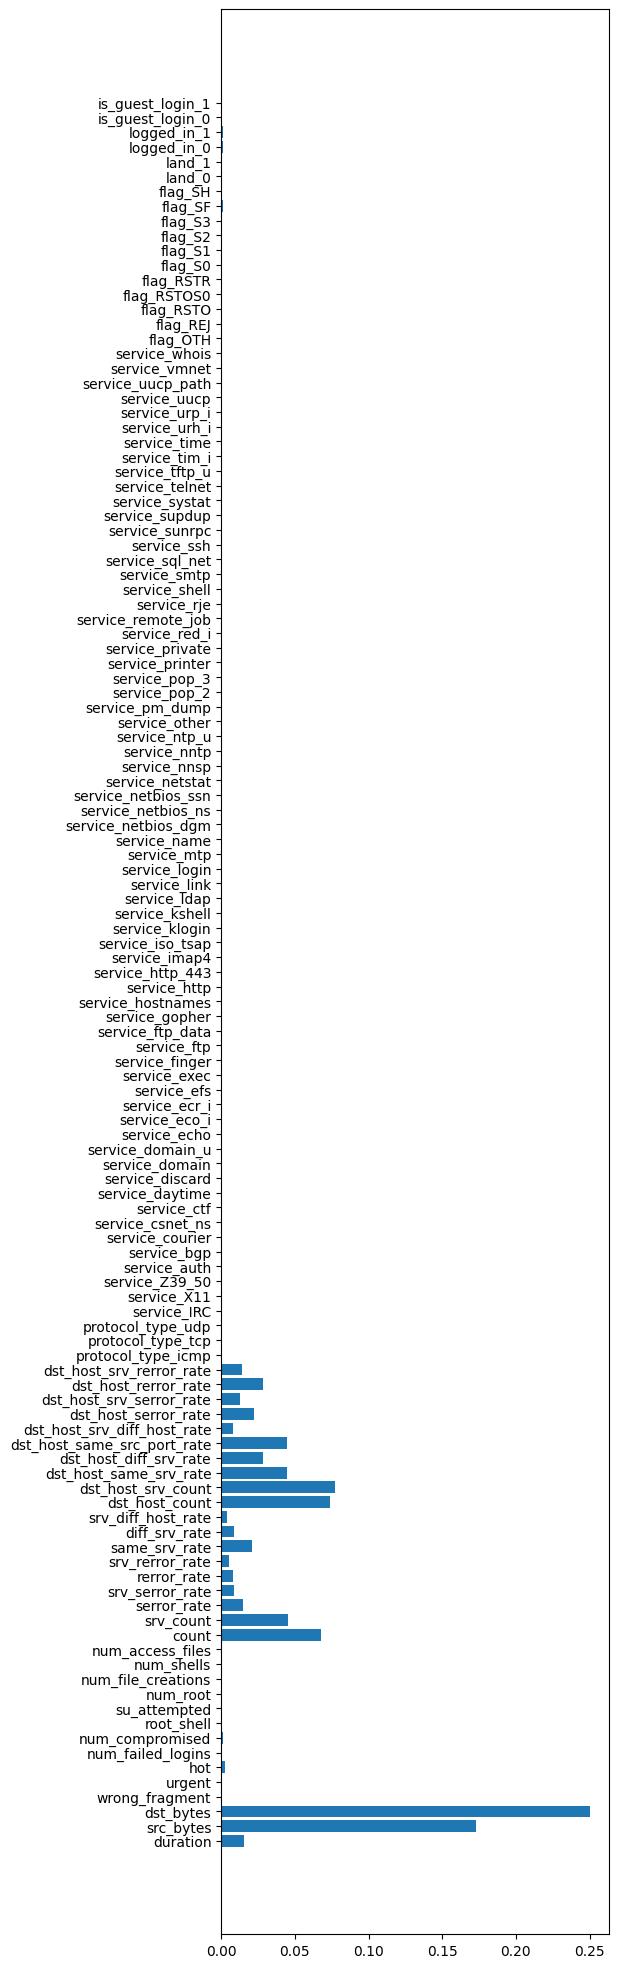

In [14]:
plt.figure(figsize=(5,25))
plt.barh(cols,data[:,1])
plt.show()

**Sensitivity of each features**

In [23]:
def sensitivity_analysis(model, X, y, perturbation):
    sensitivities = {i: [] for i in range(X.shape[1])}
    for sample_idx in range(0, X.shape[0]):
        baseline_prediction = model.predict(X[sample_idx].reshape(1, -1))[0]

        for i in range(X.shape[1]):  # Iterate over each feature
            # Perturb the feature
            perturbed_X = X[sample_idx].copy()
            perturbed_X[i] += perturbation[i]  # Increase the feature

            # Get the prediction after perturbation
            perturbed_prediction = model.predict(perturbed_X.reshape(1, -1))[0]
            sensitivity = abs(perturbed_prediction - baseline_prediction)
            if abs(sensitivity) == abs(np.inf):
                continue
            sensitivities[i].append(sensitivity)
            # Also, check effect of decreasing the feature
            perturbed_X[i] -= 2 * perturbation[i]  # Decrease the feature
            perturbed_prediction_decrease = model.predict(perturbed_X.reshape(1, -1))[0]
            sensitivity_decrease = abs(perturbed_prediction_decrease - baseline_prediction)
            if abs(sensitivity_decrease) == abs(np.inf):
                continue
            sensitivities[i].append(sensitivity_decrease)
    avg_sensitivities = {i: np.mean(sensitivities[i]) for i in sensitivities}
    return avg_sensitivities

In [24]:
sensitivity = sensitivity_analysis(clf, X_train, y_train, np.mean(X_train,axis=0)*0.1)

In [25]:
print(sensitivity)

{0: 0.03018433801600475, 1: 0.6170128064990621, 2: 0.0014124484388846155, 3: 0.0009311363912392211, 4: 0.0, 5: 0.05975241668128596, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 2.249121717969133e-05, 11: 6.747365153907399e-05, 12: 0.0, 13: 2.0242095461722196e-05, 14: 0.0036851859348924244, 15: 5.285436037227463e-05, 16: 0.0, 17: 1.3494730307814799e-05, 18: 0.001113315250394721, 19: 0.00033062089254146256, 20: 1.0121047730861098e-05, 21: 1.1245608589845665e-05, 22: 0.0, 23: 0.006522452982110486, 24: 0.0018510271738885965, 25: 0.00047456468249148706, 26: 0.0004442015392989038, 27: 0.001431565973487353, 28: 7.871926012891966e-05, 29: 1.5743852025783932e-05, 30: 0.00024065602382269724, 31: 0.002433549698842602, 32: 0.0, 33: 0.003829129724842449, 34: 0.013476737334071046, 35: 0.0, 36: 0.0, 37: 0.0, 38: 0.0, 39: 0.0, 40: 0.0, 41: 0.0, 42: 0.0, 43: 0.0, 44: 0.0, 45: 0.0, 46: 0.0, 47: 0.0, 48: 0.0, 49: 0.0, 50: 1.6267751193159072, 51: 0.0, 52: 0.0, 53: 0.0, 54: 5.060523865430549e-05, 55: 0.090830780580

In [26]:
result = sensitivity.items()
data = np.array(list(result))

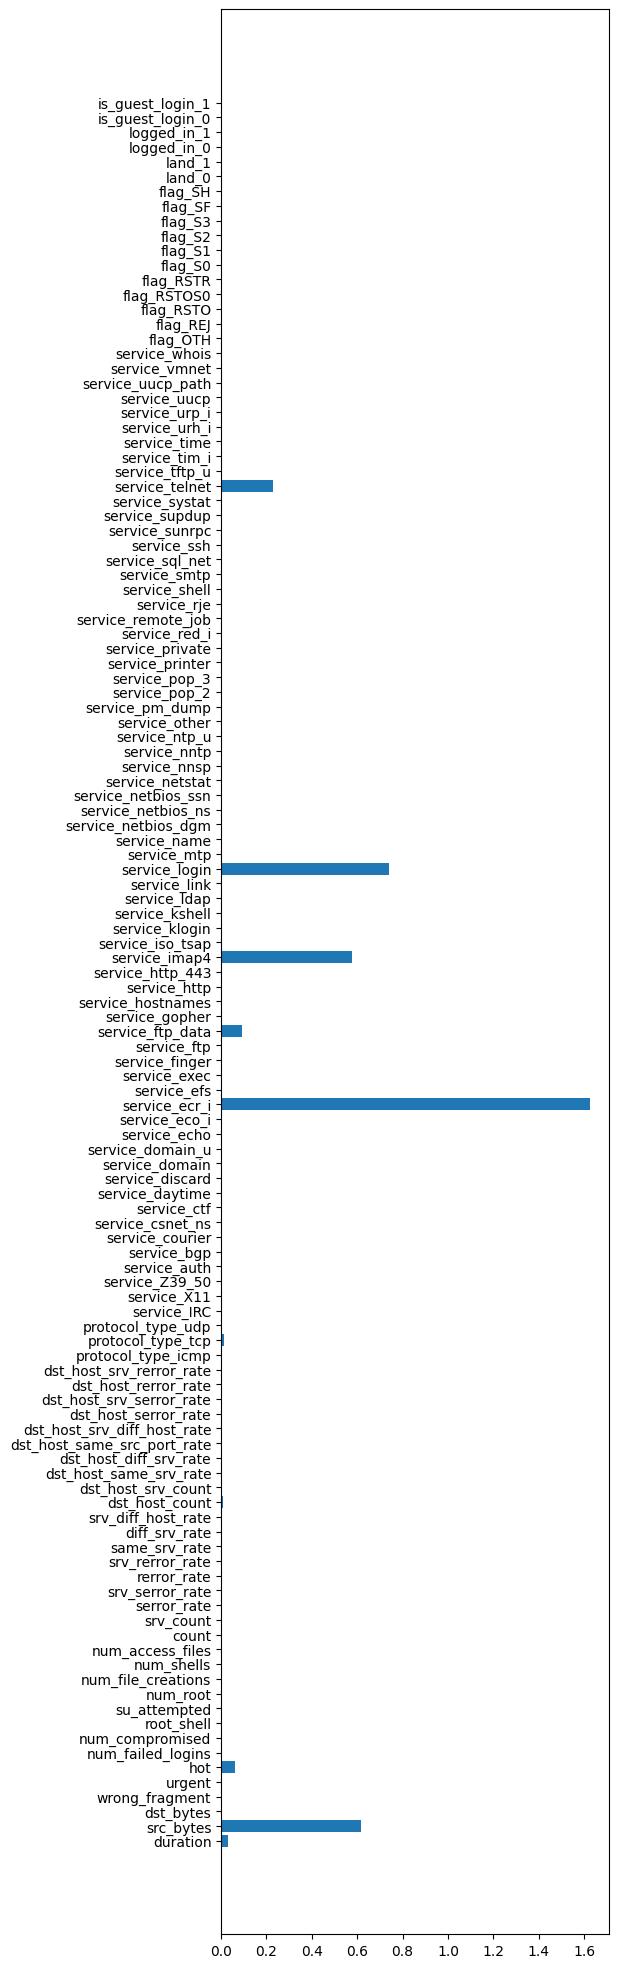

In [27]:
plt.figure(figsize=(5,25))
plt.barh(cols,data[:,1])
plt.show()